# Sign Language Recognizer

In this codelab you will train a machine learning model to identify the different signs in  American Sign Language, such that given an image of a hand sign the model predicts what alphabet the sign corresponds to. For this multi class classification problem, we will use 2 different models (a Multi Layer Perceptron and a CNN) and compare the results. 

### Download the data

First let us download the data

In [1]:
# Download the dataset
!wget https://raw.githubusercontent.com/anisham197/SignLanguageRecognizer/master/sign-language-mnist.zip

--2019-04-05 14:44:25--  https://raw.githubusercontent.com/anisham197/SignLanguagerecognizer/master/sign-language-mnist.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32286533 (31M) [application/zip]
Saving to: ‘sign-language-mnist.zip’

sign-language-mnist 100%[===================>]  30.79M  93.3MB/s    in 0.3s    

2019-04-05 14:44:26 (93.3 MB/s) - ‘sign-language-mnist.zip’ saved [32286533/32286533]



In [0]:
mkdir input

In [3]:
!unzip sign-language-mnist.zip -d input/

Archive:  sign-language-mnist.zip
  inflating: input/amer_sign2.png    
  inflating: input/amer_sign3.png    
  inflating: input/american_sign_language.PNG  
  inflating: input/sign_mnist_test.csv  
  inflating: input/sign_mnist_train.csv  


Take a look at the different hand signs in American Sign Language

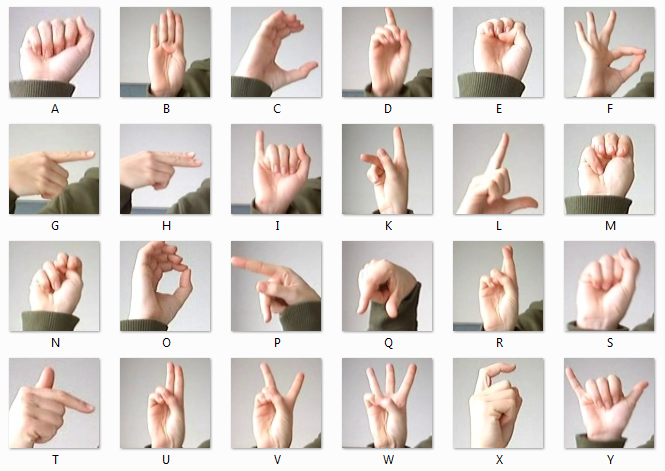

In [4]:
from IPython.display import Image
Image("./input/amer_sign2.png")

# About the data

The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion). The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

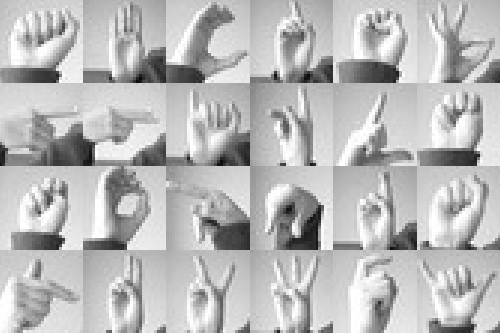

In [5]:
from IPython.display import Image
Image("./input/amer_sign3.png")

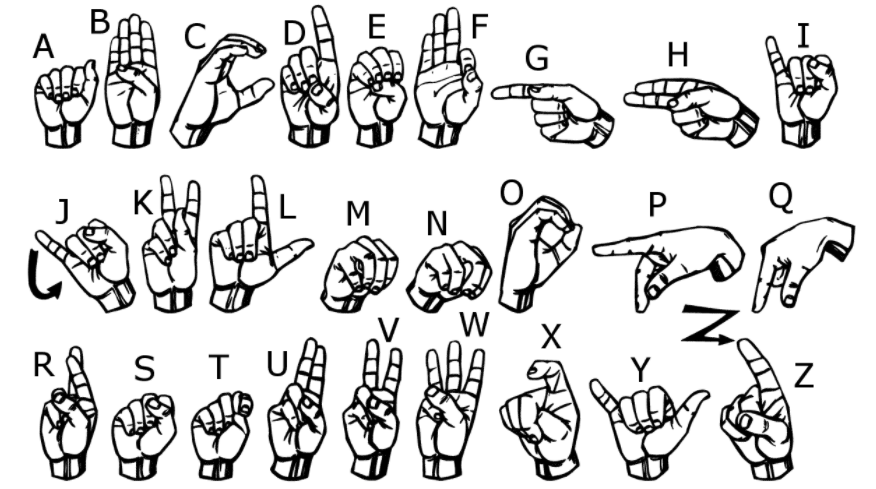

In [6]:
from IPython.display import Image
Image("./input/american_sign_language.PNG")

# Data Exploration

### Import Libraries

Import the libraries used in this codelab

In [7]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


### **Load the dataset**

In [0]:
# Load the train and test datasets using pandas.
# Reference - https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.read_csv.html
train = pd.read_csv('./input/sign_mnist_train.csv')
test = pd.read_csv('./input/sign_mnist_test.csv')

In [20]:
# Display first n rows of the data.
# Reference - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [21]:
# View the dimensionality of the DataFrame.
# Reference - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
train.shape

(27455, 785)

Extract the train/test labels and convert train/test data to numpy arrays.



In [0]:
# Load the train and test labels as numpy arrays.
# Reference - https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.values.html
y = train['label'].values
y_test = test['label'].values

In [23]:
# Print the train and test labels and their dimensionality.
print('Train Labels:\n', y)
print('Shape of Labels:', y.shape)
print('Test Labels:\n', y_test)
print('Shape of Test Labels:', y_test.shape)

Train Labels:
 [ 3  6  2 ... 18 17 23]
Shape of Labels: (27455,)
Test Labels:
 [ 6  5 10 ...  2  4  2]
Shape of Test Labels: (7172,)


In [24]:
x = (train.drop('label', axis = 1, inplace = False)).values
x_test = (test.drop('label', axis = 1, inplace = False)).values

print('Train Feature matrix:\n', x)
print('Train Shape of Feature matrix:', x.shape)
print('Test Feature matrix:\n', x_test)
print('Test Shape of Feature matrix:', x_test.shape)

Train Feature matrix:
 [[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
Train Shape of Feature matrix: (27455, 784)
Test Feature matrix:
 [[149 149 150 ... 112 120 107]
 [126 128 131 ... 184 182 180]
 [ 85  88  92 ... 225 224 222]
 ...
 [190 191 190 ... 211 209 208]
 [201 205 208 ...  67  70  63]
 [173 174 173 ... 195 193 192]]
Test Shape of Feature matrix: (7172, 784)


Let us plot the label distribution

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


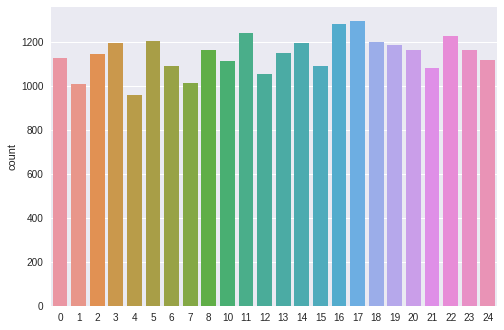

In [13]:
import seaborn as sns

sns.countplot(x = y)
plt.show()

Convert a row in the dataset to it's corresponding image

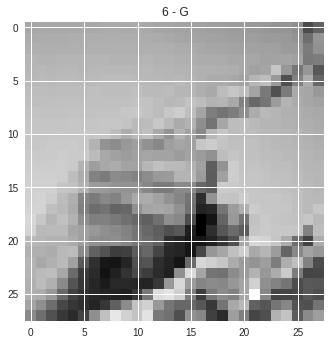

In [25]:
plt.imshow(x[1].reshape(28,28), cmap='gray')
plt.title(str(y[1]) + ' - ' + chr(y[1] + ord('A')))
plt.show()

### Data Preprocessing

Since our target variables are categorical values we encode it as one hot vectors so as to easily compare it with the output of the neural network

In [0]:
num_classes = 26
y = keras.utils.to_categorical(y, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [27]:
y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

We also normalize the train and test data 

In [0]:
x = x.astype('float32')
x_test = x_test.astype('float32')
x /= 255
x_test /= 255

Split the data into train and validation sets

In [0]:
from sklearn.model_selection import train_test_split

# Split the training data into train and validation datasets (70-30 split).
# Reference - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [30]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(19218, 784)
(8237, 784)
(19218, 26)
(8237, 26)


In [0]:
x_train[0]

In [32]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Multi Layer Perceptron with Keras

### Training

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping

Set the hyperparameters to use in the neural network. Make sure to try different parameters

In [0]:
# Hyperparameters
learning_rate = 0.01
batch_size = 64
epochs = 20
L1_no_of_neurons = 512
L3_no_of_neurons = 256
L2_dropout = 0.1
L4_dropout = 0.1

Define the different model layers and compile it

In [35]:
model = Sequential()

# Add a densely connected NN layer with output dimensionality as 'L1_no_of_neurons' and a relu activation.
# Reference - https://keras.io/layers/core/#dense
model.add(Dense(L1_no_of_neurons, input_shape=(784,), activation='relu'))

# Add a dropout layer with 'L2_dropout' dropout rate.
# Reference - https://keras.io/layers/core/#dropout
model.add(Dropout(rate=L2_dropout))

# Let's add another dense layer with output dimensionality as 'L3_no_of_neurons' and relu activation.
model.add(Dense(L3_no_of_neurons,  activation='relu'))

# Dropout layer with L4_dropout' dropout rate.
model.add(Dropout(rate=L4_dropout))

# Add a final dense layer with output as 26 classes and softmax activation.
model.add(Dense(num_classes,  activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Compile the model with an SGD optimizer. Here, we will use the 'categorical_crossentropy' loss function.
# Accuracy is one of the metrics we are interested in.
# Reference - https://keras.io/models/model/#compile
model.compile(optimizer=optimizers.SGD(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# Print the model summary
# Reference - https://keras.io/models/about-keras-models/
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 26)                6682      
Total params: 539,930
Trainable params: 539,930
Non-trainable params: 0
_________________________________________________________________


Train the compiled neural network on the training data

In [39]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=2, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)])

Instructions for updating:
Use tf.cast instead.
Train on 19218 samples, validate on 8237 samples
Epoch 1/20
 - 4s - loss: 2.9767 - acc: 0.1482 - val_loss: 2.6704 - val_acc: 0.2868
Epoch 2/20
 - 3s - loss: 2.4621 - acc: 0.3229 - val_loss: 2.1608 - val_acc: 0.4392
Epoch 3/20
 - 3s - loss: 2.0307 - acc: 0.4263 - val_loss: 1.8037 - val_acc: 0.5269
Epoch 4/20
 - 3s - loss: 1.7464 - acc: 0.4940 - val_loss: 1.5665 - val_acc: 0.5600
Epoch 5/20
 - 3s - loss: 1.5401 - acc: 0.5540 - val_loss: 1.4118 - val_acc: 0.5837
Epoch 6/20
 - 3s - loss: 1.3805 - acc: 0.5945 - val_loss: 1.2555 - val_acc: 0.6627
Epoch 7/20
 - 3s - loss: 1.2589 - acc: 0.6280 - val_loss: 1.1737 - val_acc: 0.6538
Epoch 8/20
 - 3s - loss: 1.1506 - acc: 0.6599 - val_loss: 1.0837 - val_acc: 0.6895
Epoch 9/20
 - 3s - loss: 1.0639 - acc: 0.6847 - val_loss: 1.0325 - val_acc: 0.6886
Epoch 10/20
 - 3s - loss: 0.9883 - acc: 0.7085 - val_loss: 0.9481 - val_acc: 0.7216
Epoch 11/20
 - 3s - loss: 0.9226 - acc: 0.7267 - val_loss: 0.8735 - val_

### Model Performance Visualization

Plot a graph of the training and validation accuracy

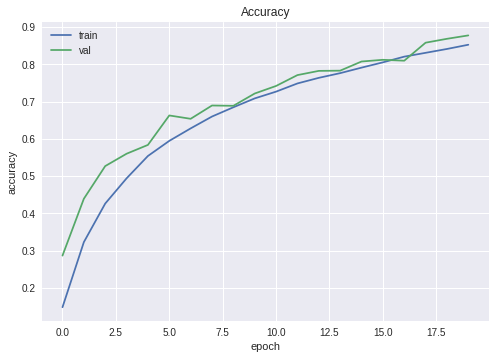

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

Plot a graph of the training and validation loss

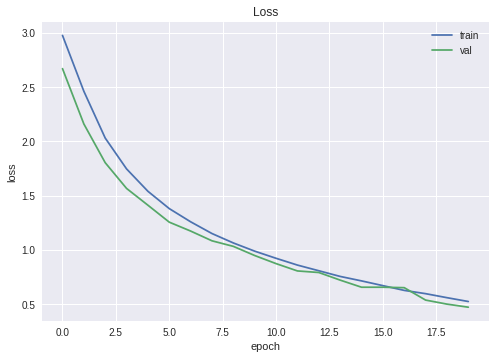

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### Inference

Predict the output labels of the test set

In [42]:
# Predict the output labels for the test dataset.
# Reference - https://keras.io/models/model/#predict
y_pred = model.predict(x_test)

y_pred

array([[2.87747746e-08, 1.50776095e-05, 2.36929627e-03, ...,
        4.39489988e-04, 3.57576681e-07, 1.09153518e-06],
       [7.48394377e-05, 3.44910137e-02, 7.23197809e-05, ...,
        1.30493985e-02, 3.87041178e-03, 2.71577941e-04],
       [1.08608781e-07, 3.29424947e-05, 1.15104847e-07, ...,
        3.56063218e-04, 7.51880789e-03, 1.46517027e-06],
       ...,
       [4.10717149e-08, 5.28039379e-07, 9.08671200e-01, ...,
        6.95836115e-06, 1.71028774e-10, 1.96504901e-09],
       [7.62965137e-05, 7.70607148e-04, 4.08244614e-06, ...,
        1.93506349e-08, 3.56094931e-10, 7.05878689e-10],
       [3.54203635e-08, 3.62971321e-07, 9.04626727e-01, ...,
        5.49995366e-06, 1.29685734e-10, 1.51175095e-09]], dtype=float32)

Compute the accuracy of the model

In [43]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model.
# Reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy_score(y_test, y_pred.round())

0.5815672058003346

## Download the model for online serving

In [0]:
!pip install tensorflowjs==0.8.5

In [0]:
import tensorflowjs as tfjs

# Save the Keras model we created to use in our web application.
# Reference - 
tfjs.converters.save_keras_model(model, 'mlp.tfjs')

# CNN with Keras

### Data Preprocessing

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Load the train and test dataset and sepearate into data and labels

In [0]:
# Load the train and test datasets.
# Reference - https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.read_csv.html
train = pd.read_csv('./input/sign_mnist_train.csv')
test = pd.read_csv('./input/sign_mnist_test.csv')

y = train['label'].values
y_test = test['label'].values
x = (train.drop('label', axis = 1, inplace = False)).values
x_test = (test.drop('label', axis = 1, inplace = False)).values

Convert the labels into one-hot vectors

In [0]:
num_classes = 26
y = keras.utils.to_categorical(y, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Normalize the data and reshape to input expected by CNN

In [0]:
x = x.astype('float32')
x_test = x_test.astype('float32')
x /=  255
x_test /= 255
x = x.reshape(x.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Split the data into train and validation

In [0]:
from sklearn.model_selection import train_test_split

# Split the training data into train and validation datasets (70-30 split).
# Reference - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 101)

Set the hyperparameters of the model

In [0]:
batch_size = 128
num_classes = 26
epochs = 10

Define the network architecture

In [0]:
model = Sequential()

# Add a 2D convolution layer with output space as 64, a 3 x 3 kernel and relu activation.
# Reference - https://keras.io/layers/convolutional/#conv2d
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))

# The convolution layer is followed by a maxpool layer with a 2 x 2 filter.
# Reference - https://keras.io/layers/pooling/#maxpooling2d
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another convolution layer with output space as 64, a 3 x 3 kernel and relu activation.
# Follow this with a maxpool layer with a 2 x 2 filter.
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a third convolution layer with output space as 64, a 3 x 3 kernel and relu activation.
# Follow this with a maxpool layer with a 2 x 2 filter.
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the input to the model.
# Reference - https://keras.io/layers/core/#flatten
model.add(Flatten())

# Add a dense layer with with output space as 128 and relu activation.
# Reference - https://keras.io/layers/core/#dense
model.add(Dense(128, activation = 'relu'))

# Add a droupout layer with 20% of the input units set to 0.
# Reference - https://keras.io/layers/core/#dropout
model.add(Dropout(0.20))

# Add a final dense layer with output as 26 classes and softmax activation.
model.add(Dense(num_classes, activation = 'softmax'))

Compile the model and view the summary

In [51]:
# Compile the model with an Adam optimizer. Here, we will use the 'categorical_crossentropy' loss function.
# Accuracy is one of the metrics we are interested in.
# Reference - https://keras.io/models/model/#compile
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Print the model summary
# Reference - https://keras.io/models/about-keras-models/
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

Train the model on the training data

In [52]:
# Train the model providing training data, labels, validation data, epochs and batch size.
# Reference - https://keras.io/models/model/#fit
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 33s 2ms/step - loss: 2.8018 - acc: 0.1486 - val_loss: 1.9172 - val_acc: 0.3653
Epoch 2/10
19218/19218 [==============================] - 33s 2ms/step - loss: 1.4687 - acc: 0.5108 - val_loss: 0.9899 - val_acc: 0.6808
Epoch 3/10
19218/19218 [==============================] - 33s 2ms/step - loss: 0.8650 - acc: 0.7030 - val_loss: 0.5521 - val_acc: 0.8181
Epoch 4/10
19218/19218 [==============================] - 33s 2ms/step - loss: 0.5562 - acc: 0.8084 - val_loss: 0.4025 - val_acc: 0.8741
Epoch 5/10
19218/19218 [==============================] - 33s 2ms/step - loss: 0.3968 - acc: 0.8626 - val_loss: 0.2786 - val_acc: 0.9088
Epoch 6/10
19218/19218 [==============================] - 33s 2ms/step - loss: 0.2741 - acc: 0.9095 - val_loss: 0.1576 - val_acc: 0.9609
Epoch 7/10
19218/19218 [==============================] - 33s 2ms/step - loss: 0.1936 - acc: 0.9386 - val_loss: 0.1422 - val_acc:

Plot the accuracy over train and validation datasets

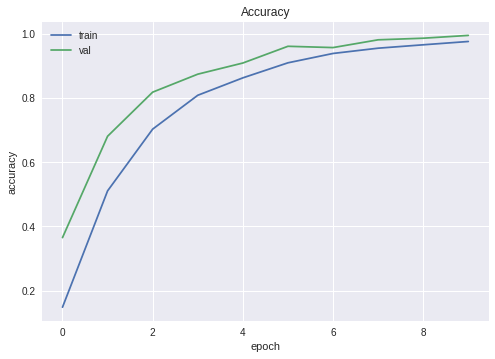

In [53]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

Plot the loss over train and validation datasets

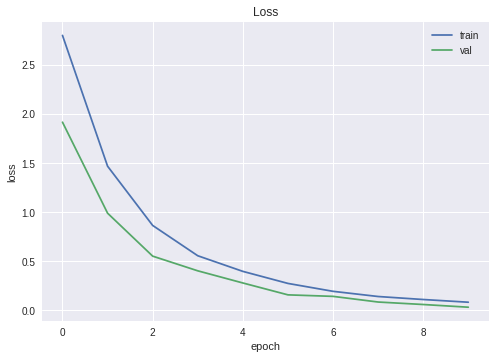

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### Inference

Predict the output labels of the test set

In [56]:
# Predict the output labels for the test dataset.
# Reference - https://keras.io/models/model/#predict
y_pred = model.predict(x_test)

y_pred

array([[2.6961655e-14, 5.1532576e-14, 2.0740754e-07, ..., 6.8420053e-07,
        3.1469148e-15, 4.9517360e-15],
       [3.0668568e-09, 6.5616237e-05, 4.6329603e-08, ..., 1.2151416e-05,
        9.2486153e-13, 3.1398378e-12],
       [5.5488398e-16, 2.7176900e-17, 2.1490313e-19, ..., 7.8750195e-13,
        7.8008862e-09, 1.3875029e-19],
       ...,
       [1.8928243e-28, 3.4387497e-21, 3.4463158e-01, ..., 2.1178722e-07,
        1.3140349e-36, 6.5501847e-23],
       [3.6024596e-13, 3.6188470e-07, 1.3655374e-07, ..., 3.2116624e-13,
        1.3258681e-35, 6.6090027e-27],
       [1.5076452e-30, 9.4156570e-23, 2.5199696e-01, ..., 3.8176292e-08,
        0.0000000e+00, 8.4905089e-25]], dtype=float32)

Compute the accuracy on the test set

In [57]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model.
# Reference - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy_score(y_test, y_pred.round())

0.8572225320691579

## Download the model for online serving

In [0]:
!pip install tensorflowjs==0.8.5

In [0]:
import tensorflowjs as tfjs

# Save the Keras model we created to use in our web application.
# Reference - 
tfjs.converters.save_keras_model(model, 'cnn.tfjs')

# Multi Layer Perceptron with TensorFlow

In [0]:
import tensorflow as tf

In [0]:
# Load the train and test datasets.
# Reference - https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.read_csv.html
train = pd.read_csv('./input/sign_mnist_train.csv')
test = pd.read_csv('./input/sign_mnist_test.csv')

y = train['label'].values
y_test = test['label'].values
x = (train.drop('label', axis = 1, inplace = False)).values
x_test = (test.drop('label', axis = 1, inplace = False)).values

In [0]:
num_classes = 26
y = keras.utils.to_categorical(y, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x = x.astype('float32')
x_test = x_test.astype('float32')
x /=  255
x_test /= 255

In [0]:
# Hyperparameters
learning_rate = 0.001
batch_size = 128
epochs = 2500
display_step = 500

In [0]:
# Network Hyperparameters
n_inputs = 784
nh1 = 256
nh2 = 256
nh3 = 256
nh4 = 256
nh5 = 256
n_outputs = 26

In [0]:
X = tf.placeholder('float', [None, n_inputs])
Y = tf.placeholder('float', [None, n_outputs])

In [0]:
weights = {
    'w1' : tf.Variable(tf.random_normal([n_inputs, nh1])),
    'w2' : tf.Variable(tf.random_normal([nh1, nh2])),
    'w3' : tf.Variable(tf.random_normal([nh2, nh3])),
    'w4' : tf.Variable(tf.random_normal([nh3, nh4])),
    'w5' : tf.Variable(tf.random_normal([nh4, nh5])),
    'out_w' : tf.Variable(tf.random_normal([nh5, n_outputs]))
}

In [0]:
biases = {
    'b1' : tf.Variable(tf.random_normal([nh1])),
    'b2' : tf.Variable(tf.random_normal([nh2])),
    'b3' : tf.Variable(tf.random_normal([nh3])),
    'b4' : tf.Variable(tf.random_normal([nh4])),
    'b5' : tf.Variable(tf.random_normal([nh5])),
    'out_b' : tf.Variable(tf.random_normal([n_outputs]))
}

In [0]:
def neural_network(x, weights, biases):
    layer1 = tf.nn.relu(tf.add(tf.matmul(x, weights['w1']), biases['b1']))
    layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, weights['w2']), biases['b2']))
    layer3 = tf.nn.relu(tf.add(tf.matmul(layer2, weights['w3']), biases['b3']))
    layer4 = tf.nn.relu(tf.add(tf.matmul(layer3, weights['w4']), biases['b4']))
    layer5 = tf.nn.relu(tf.add(tf.matmul(layer4, weights['w5']), biases['b5']))
    layer_out = tf.matmul(layer5, weights['out_w']) + biases['out_b']
    return layer_out

In [69]:
logits = neural_network(X, weights, biases)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss_op)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
init = tf.global_variables_initializer()

In [0]:
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [72]:
with tf.Session() as sess:
    
    sess.run(init)
    
    cost_hist, acc_hist = [], []
    
    for epoch in range(1, epochs + 1):
        batch_x, batch_y = next_batch(batch_size, x, y)
        
        sess.run(training_op, feed_dict = { X : batch_x, Y : batch_y })
        
        if epoch % display_step == 0:
            c, acc = sess.run([loss_op, accuracy], feed_dict = { X : batch_x, Y : batch_y })
            cost_hist.append(c)
            acc_hist.append(acc)
            print('Epoch ' + str(epoch) + ', Cost: ' + str(c) + ', Accuracy: ' + str(acc))
    
    W = sess.run(weights)
    B = sess.run(biases)
    print('Accuracy on train data: ' + str(sess.run(accuracy, feed_dict = { X : x, Y : y }) * 100) + ' %')
    print('Accuracy on test data: ' + str(sess.run(accuracy, feed_dict = { X : x_test, Y : y_test }) * 100) + ' %')


Epoch 500, Cost: 58689.6, Accuracy: 0.625
Epoch 1000, Cost: 3777.4512, Accuracy: 0.90625
Epoch 1500, Cost: 2929.546, Accuracy: 0.9765625
Epoch 2000, Cost: 289.22937, Accuracy: 0.9765625
Epoch 2500, Cost: 1583.7217, Accuracy: 0.9765625
Accuracy on train data: 96.41595482826233 %
Accuracy on test data: 57.794201374053955 %
